In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt

In [2]:
FICHERO_RESEÑAS = 'GPT_transformer/data/df_para_clasificación.csv'

In [3]:
reviews = pd.read_csv(FICHERO_RESEÑAS)

In [4]:
reviews.head()

,reseñas,IA,longitud
0,Necesitaba un nuevo movil y me decidí por este...,0,297
1,Está en perfectas condiciones la batería al 10...,0,99
2,Me llegó ayer el iPhone en perfectas condicion...,0,436
3,Compré un iPhone 12 a este vendedor y hace un...,0,657
4,Soy usuario de IPhone desde el principio. Teng...,0,596


In [5]:
# Si queremos hacer un modelo supervisado necesitaremos sacar mas features

In [6]:
# Longitud promedio de las palabras
def obtener_longitud_promedio(reseña: str):
    palabras = word_tokenize(reseña.lower()) # Separamos el texto en palabras
    promedio = sum(len(word) for word in palabras) / len(palabras) # Hacemos el len de cada palabra de todas las palabras
    return promedio

reviews['longitud_promedio'] = reviews['reseñas'].apply(lambda x: obtener_longitud_promedio(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244


In [7]:
# Frecuencia de palabras únicas
def frecuencia_palabras_unicas(reseña: str):
    palabras = word_tokenize(reseña.lower()) 
    frecuencia = len(set(palabras)) / len(palabras)
    return frecuencia

reviews['palabras_unicas'] = reviews['reseñas'].apply(lambda x: frecuencia_palabras_unicas(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655


In [8]:
# Frecuencia de signos de puntuación
def frecuencia_signos_de_puntuacion(reseña: str):
    frecuencia = sum(1 for char in reseña if char in string.punctuation) # Si hay un signo de puntuación suma 1
    return frecuencia

reviews['signos_de_puntuación'] = reviews['reseñas'].apply(lambda x: frecuencia_signos_de_puntuacion(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11


In [9]:
# Frecuencia de pronombres
def frecuencia_pronombres(reseña: str):
    palabras = word_tokenize(reseña.lower()) 
    pronombres = ['yo', 'tú', 'él', 'ella', 'nosotros', 'vosotros', 'ellos', 'ellas', 'nosotras', 'vosotras']
    frecuencia = sum(1 for word in palabras if word in pronombres)
    return frecuencia

reviews['frecuencia_pronombres'] = reviews['reseñas'].apply(lambda x: frecuencia_pronombres(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0


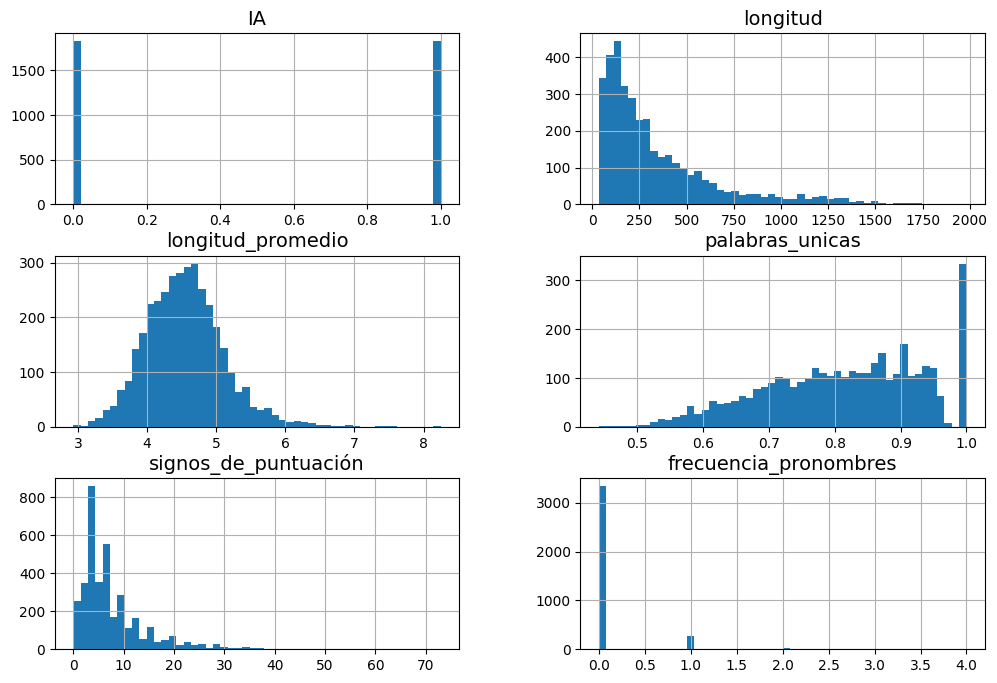

In [10]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

reviews.hist(bins=50, figsize=(12, 8))
plt.show()

In [11]:
# Vamos a añadir algunas caracteristicas de estilo
nltk.download('punkt')

def variedad_lexica(reseña: str):
    palabras = word_tokenize(reseña)
    palabras_unicas = set(palabras)
    frecuencia = len(palabras_unicas) / len(palabras)
    return frecuencia

reviews['variedad_lexica'] = reviews['reseñas'].apply(lambda x: variedad_lexica(x))
reviews.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pabma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462


In [12]:
# Entropia léxica, mide la incertidumbre en la eleccion de las palabras, usamos el calculo de la entropia de Shannon
import numpy as np
from collections import Counter

def entropia_lexica(reseña: str):
    palabras = word_tokenize(reseña)
    conteo_palabras = Counter(palabras)
    palabras_totales = len(palabras)
    probab = [count / palabras_totales for count in conteo_palabras.values()]
    entropia = -sum(p * np.log2(p) for p in probab)
    return entropia

reviews['entropia_lexica'] = reviews['reseñas'].apply(lambda x: entropia_lexica(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860


In [13]:
# Analisis del sentimiento
from textblob import TextBlob

def analisis_sentimiento(reseña):
    blob = TextBlob(reseña)
    polaridad = blob.sentiment.polarity
    subjetividad = blob.sentiment.subjectivity
    return polaridad, subjetividad

reviews['sentimiento'] = reviews['reseñas'].apply(lambda x: analisis_sentimiento(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,sentimiento
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,"(0.0, 0.0)"
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,"(0.0, 0.0)"
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,"(0.0, 0.0)"
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,"(0.0, 0.0)"
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,"(0.0, 0.0)"


In [14]:
reviews['sentimiento'].value_counts() # Parece que los resultados no concluyen en nada

sentimiento
(0.0, 0.0)                                   2809
(1.0, 1.0)                                    122
(0.9, 1.0)                                     41
(0.0, 0.75)                                    31
(0.375, 0.75)                                  28
                                             ... 
(-0.4000000000000001, 0.4666666666666666)       1
(-0.06875, 0.7875)                              1
(0.25, 1.0)                                     1
(-0.29296875, 0.75)                             1
(0.3125, 0.25)                                  1
Name: count, Length: 263, dtype: int64

In [15]:
reviews.drop(columns=['sentimiento'], inplace=True, errors='ignore')

In [16]:
# Uso de frases hechas y modismos
import re
expresiones_espanol_españa = [
    "Más vale tarde que nunca",
    "Matar dos pájaros de un tiro",
    "A buen entendedor, pocas palabras bastan",
    "Más vale prevenir que curar",
    "A caballo regalado no le mires el diente",
    "Cada loco con su tema",
    "A mal tiempo, buena cara",
    "Echar leña al fuego",
    "Camarón que se duerme, se lo lleva la corriente",
    "El que mucho abarca, poco aprieta",
    "El que ríe el último, ríe mejor",
    "Ojos que no ven, corazón que no siente",
    "Perro ladrador, poco mordedor",
    "Quien siembra vientos, recoge tempestades",
    "Zapatero, a tus zapatos"
]

def contar_frases_hechas(reseña, expresiones):
    regex = r'\b(?:{})\b'.format('|'.join(expresiones))
    return len(re.findall(regex, reseña.lower()))

reviews['expresiones'] = reviews['reseñas'].apply(lambda x: contar_frases_hechas(x, expresiones_espanol_españa))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,expresiones
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,0
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,0


In [17]:
reviews['expresiones'].value_counts() # no hay ninguna, eliminamos la columna

expresiones
0    3648
Name: count, dtype: int64

In [18]:
reviews.drop(columns=['expresiones'], inplace=True, errors='ignore')

In [19]:
# Modelos de representación de texto

from sklearn.feature_extraction.text import TfidfVectorizer

def calcular_tfidf(reseña):
    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform([reseña])
    tfidf_values = X.toarray()[0]
    # Como al aplicar un modelo supervisado no podemos tener un diccionario en la columna, debemos buscar alguna operación que resuma,
    # los resultados del diccionario, el unico problema es que estas operaciones pueden ser sensibles al riudo, las operaciones mas interesantes son:
    # la suma, la media, la media ponderada y la desviación estándar, la mas interesante podría ser la desviación estándar ya que puede ser útil 
    # para entender la variabilidad en la importancia de los términos.
    desviacion_estandar = np.std(tfidf_values)
    return desviacion_estandar

reviews['tfidf'] = reviews['reseñas'].apply(lambda x: calcular_tfidf(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,tfidf
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,5.640761e-02
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,5.551115e-17
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,5.749596e-02
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,7.866846e-02
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,7.357145e-02


In [20]:
# Características de complejidad linguistica
def contar_palabras_complejas(reseña: str):
    palabras_complejas = [palabra for palabra in reseña.split() if len(palabra) > 10]  # Ejemplo: palabras más largas
    return len(palabras_complejas)

def contar_palabras_tecnicas(reseña, tecnicismos):
    tecnicas_count = {termino: reseña.lower().count(termino) for termino in tecnicismos}
    cantidad_tecnicismos = sum(1 for count in tecnicas_count.values() if count > 0)

    return cantidad_tecnicismos

In [21]:
tecnicismos_resenas_productos = [
    "Calidad",
    "Desempeño",
    "Durabilidad",
    "Fiabilidad",
    "Ergonomía",
    "Usabilidad",
    "Estética",
    "Innovación",
    "Funcionalidad",
    "Eficiencia",
    "Confiabilidad",
    "Costo-beneficio",
    "Accesibilidad",
    "Portabilidad",
    "Adaptabilidad",
    "Mantenimiento",
    "Seguridad",
    "Sostenibilidad",
    "Comodidad",
    "Resistencia",
    "Potencia",
    "Precisión",
    "Versatilidad",
    "Robustez",
    "Autonomía",
    "Interfaz",
    "Actualización",
    "Intuitividad",
    "Compatibilidad",
    "Personalización",
    "Diseño",
    "Acabado",
    "Capacidad",
    "Performance",
    "Retroalimentación",
    "Eficiencia_energética",
    "Consumo",
    "Temperatura",
    "Rendimiento_térmico",
    "Velocidad",
    "Tiempo_de_respuesta",
    "Consumo_de_recursos",
    "Manejabilidad",
    "Adherencia",
    "Impermeabilidad",
    "Capacidad_de_carga",
    "Duración",
    "Estabilidad",
    "Resistencia_al_desgaste",
    "Facilidad_de_instalación",
    "Compatibilidad_con_sistemas",
    "Reducción_de_ruido",
    "Eco-amigable",
    "Tamaño",
    "Peso",
    "Facilidad_de_uso",
    "Insonorización",
    "Antibacteriano",
    "Antideslizante",
    "Resistencia_a_la_corrosión",
    "Resistencia_a_la_tracción",
    "Facilidad_de_limpieza",
    "Tecnología",
    "Innovación",
    "Eficiencia_energética",
    "Innovación",
    "Compatibilidad",
    "Precisión",
    "Estabilidad",
    "Fiabilidad",
    "Interfaz_de_usuario",
    "Ergonomía",
    "Capacidad_de_carga",
    "Integración",
    "Durabilidad",
    "Resistencia_al_agua",
    "Seguridad_al_usuario",
    "Eficiencia_en_el_uso_de_energía",
    "Fácil_mantenimiento",
    "Sostenibilidad_ambiental",
    "Resistencia_al_impacto",
    "Comodidad_de_uso",
    "Estabilidad_de_conexión",
    "Funcionalidad_multimedia",
    "Desempeño_en_condiciones_extremas",
    "Facilidad_de_ensamblaje",
    "Optimización_de_espacio",
    "Compatibilidad_de_formatos",
    "Protección_de_datos",
    "Facilidad_de_configuración",
    "Control_de_energía",
    "Compatibilidad_de_sistemas",
    "Escalabilidad",
    "Interoperabilidad",
    "Capacidad_de_expansión",
    "Facilidad_de_gestión",
    "Capacidad_de_procesamiento",
    "Conectividad",
    "Eficiencia_operativa",
    "Fiabilidad_de_datos",
    "Reciclabilidad",
    "Resistencia_al_fuego",
    "Calibración",
    "Funcionalidad_remota",
    "Estabilidad_de_software",
    "Compatibilidad_de_protocolos",
    "Innovación_tecnológica",
    "Estrategia_de_mercado",
    "Gestión_de_inventario",
    "Optimización_de_costos",
    "Adaptación_al_usuario",
    "Procesamiento_de_datos",
    "Análisis_de_datos",
    "Interacción_usuario-máquina",
    "Estabilidad_de_red",
    "Optimización_de_rendimiento",
    "Seguridad_de_la_información",
    "Cumplimiento_de_normativas",
    "Ajuste_personalizado",
    "Control_de_calidad"
]
for indice, tecnicismo in enumerate(tecnicismos_resenas_productos):
    tecnicismos_resenas_productos[indice] = tecnicismo.replace("_", " ")

In [22]:
reviews['palabras_complejas'] = reviews['reseñas'].apply(lambda x: contar_palabras_complejas(x))
reviews['tecnicismos'] = reviews['reseñas'].apply(lambda x: contar_palabras_tecnicas(x, tecnicismos_resenas_productos))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,tfidf,palabras_complejas,tecnicismos
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,5.640761e-02,3,0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,5.551115e-17,2,0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,5.749596e-02,5,0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,7.866846e-02,5,0
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,7.357145e-02,4,0


In [23]:
# Vamos a darle una vueltecita a nuevas columnas, empezamos con analisis de sentimiento
from textblob import TextBlob

def calcular_polaridad(reseña: str):
    blob = TextBlob(reseña)
    return blob.sentiment.polarity

def calcular_subjetividad(reseña: str):
    blob = TextBlob(reseña)
    return blob.sentiment.subjectivity

reviews['polaridad'] = reviews['reseñas'].apply(lambda x: calcular_polaridad(x))
reviews['subjetividad'] = reviews['reseñas'].apply(lambda x: calcular_subjetividad(x))
reviews.head()

,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,tfidf,palabras_complejas,tecnicismos,polaridad,subjetividad
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,5.640761e-02,3,0,0.0,0.0
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,5.551115e-17,2,0,0.0,0.0
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,5.749596e-02,5,0,0.0,0.0
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,7.866846e-02,5,0,0.0,0.0
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,7.357145e-02,4,0,0.0,0.0


In [24]:
# Caracteristicas de cohesion y coherencia

nltk.download('stopwords')
nltk.download('punkt')

def calcular_coherencia_tematica(reseña: str):
    stop_words = set(stopwords.words('spanish')) # Esto proporciona una lista de palabras muy comunes en el español que no sirven para lo que queremos analizar
    words = word_tokenize(reseña.lower())
    palabras_filtradas = [word for word in words if word.isalnum() and word not in stop_words]
    text = nltk.Text(palabras_filtradas)
    cohesion = len(set(text)) / len(text)
    return cohesion # Valores mas altos indican una mayor coherencia temática

reviews['coherencia'] = reviews['reseñas'].apply(lambda x: calcular_coherencia_tematica(x))
reviews.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pabma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pabma\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,reseñas,IA,longitud,longitud_promedio,palabras_unicas,signos_de_puntuación,frecuencia_pronombres,variedad_lexica,entropia_lexica,tfidf,palabras_complejas,tecnicismos,polaridad,subjetividad,coherencia
0,Necesitaba un nuevo movil y me decidí por este...,0,297,4.066667,0.733333,6,0,0.733333,5.267482,5.640761e-02,3,0,0.0,0.0,0.920000
1,Está en perfectas condiciones la batería al 10...,0,99,5.375000,1.000000,2,0,1.000000,4.000000,5.551115e-17,2,0,0.0,0.0,1.000000
2,Me llegó ayer el iPhone en perfectas condicion...,0,436,4.402439,0.695122,7,0,0.707317,5.710972,5.749596e-02,5,0,0.0,0.0,0.857143
3,Compré un iPhone 12 a este vendedor y hace un...,0,657,4.124031,0.581395,10,1,0.604651,5.880116,7.866846e-02,5,0,0.0,0.0,0.823529
4,Soy usuario de IPhone desde el principio. Teng...,0,596,4.109244,0.638655,11,0,0.655462,5.953860,7.357145e-02,4,0,0.0,0.0,0.953488


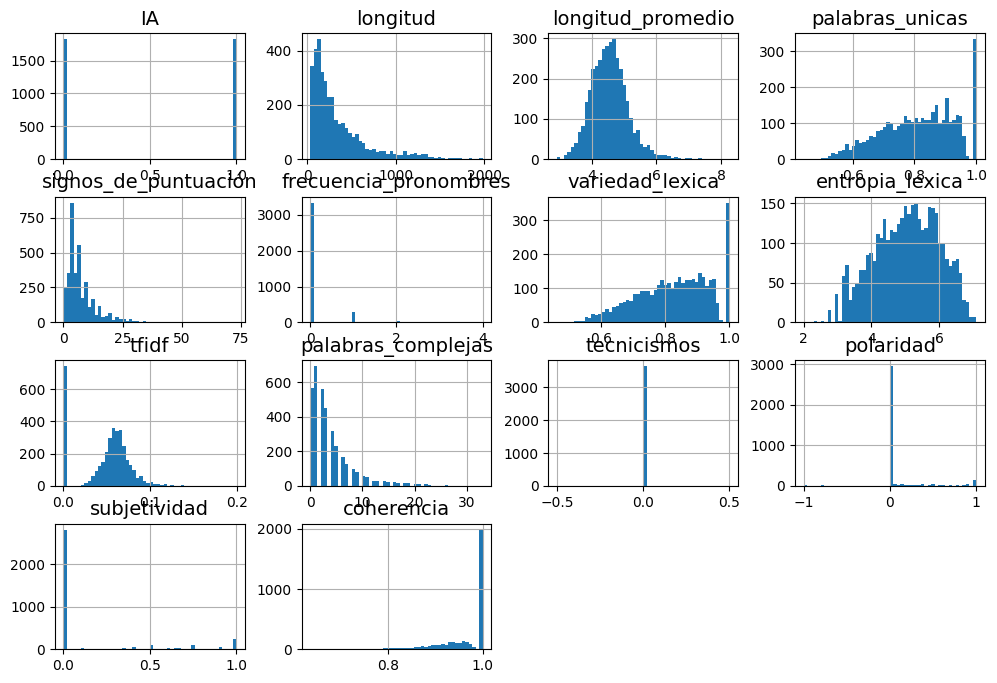

In [26]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

reviews.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
reviews.to_csv('GPT_transformer/data/reviews_random_forest.csv', index=False)